In [2]:
import os
import sys
sys.path.append(os.path.abspath('../../../..'))

import numpy as np
import pandas as pd

rec_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05'

hdf5_file_path = os.path.join(rec_path, 'MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5')

# Load the DataFrame from the HDF5 file
df_merged_with_dF_F = pd.read_hdf(hdf5_file_path, key='df')

# List of keypoints to analyze (indices)
head_keypoints = [1, 2, 3, 4]  # Example: EarL, EarR, Snout, SpineF

# Adjust for egocentric coordinates
if 'com_x' in df_merged_with_dF_F.columns and 'com_y' in df_merged_with_dF_F.columns and 'com_z' in df_merged_with_dF_F.columns:
    head_coords = df_merged_with_dF_F[
        [f"kp{idx}_{axis}" for idx in head_keypoints for axis in ['x', 'y', 'z']]
    ].copy()

    for axis in ['x', 'y', 'z']:
        com_col = f'com_{axis}'
        if com_col in df_merged_with_dF_F.columns:
            head_coords[[f"kp{idx}_{axis}" for idx in head_keypoints]] -= df_merged_with_dF_F[com_col].values[:, None]
        else:
            print(f"Warning: {com_col} not found. Cannot adjust for egocentric {axis} coordinates.")
else:
    print("COM columns (com_x, com_y, com_z) not found. Using absolute coordinates.")

# Result: head_coords now contains egocentric coordinates for each head keypoint.



In [ ]:
def pairwise_distances(coords):
    distances = []
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            dist = np.linalg.norm(coords[i] - coords[j])
            distances.append(dist)
    return np.mean(distances)

head_geometry = head_coords.apply(lambda row: pairwise_distances(row.values.reshape(-1, 3)), axis=1)



In [ ]:
# import numpy as np
# from scipy.spatial.transform import Rotation as R

# def rigid_body_transform_and_angles(current, template):
#     centroid_current = np.mean(current, axis=0)
#     centroid_template = np.mean(template, axis=0)

#     current_centered = current - centroid_current
#     template_centered = template - centroid_template

#     H = current_centered.T @ template_centered
#     U, _, Vt = np.linalg.svd(H)
#     R_matrix = Vt.T @ U.T

#     if np.linalg.det(R_matrix) < 0:
#         Vt[-1, :] *= -1
#         R_matrix = Vt.T @ U.T

#     t = centroid_template - R_matrix @ centroid_current
#     rotation = R.from_matrix(R_matrix)
#     angles = rotation.as_euler('xyz', degrees=True)  # Pitch, yaw, roll
#     return R_matrix, t, angles

# # Egocentric adjustment
# head_coords = df_merged_with_dF_F[
#     [f"kp{idx}_{axis}" for idx in head_keypoints for axis in ['x', 'y', 'z']]
# ].copy()

# for axis in ['x', 'y', 'z']:
#     com_col = f'com_{axis}'
#     if com_col in df_merged_with_dF_F.columns:
#         head_coords.loc[:, [f"kp{idx}_{axis}" for idx in head_keypoints]] -= df_merged_with_dF_F[com_col].values[:, None]

# # Select template
# template_time = head_coords.apply(lambda row: np.var(row.values.reshape(-1, 3)), axis=1).idxmin()
# template_coords = head_coords.loc[template_time].values.reshape(-1, 3)

# # Apply transformation and extract angles
# results = head_coords.apply(
#     lambda row: rigid_body_transform_and_angles(row.values.reshape(-1, 3), template_coords),
#     axis=1
# )

# # Add angles to DataFrame
# df_merged_with_dF_F['head_pitch'] = results.apply(lambda x: x[2][0])  # Pitch
# df_merged_with_dF_F['head_yaw'] = results.apply(lambda x: x[2][1])    # Yaw
# df_merged_with_dF_F['head_roll'] = results.apply(lambda x: x[2][2])   # Roll


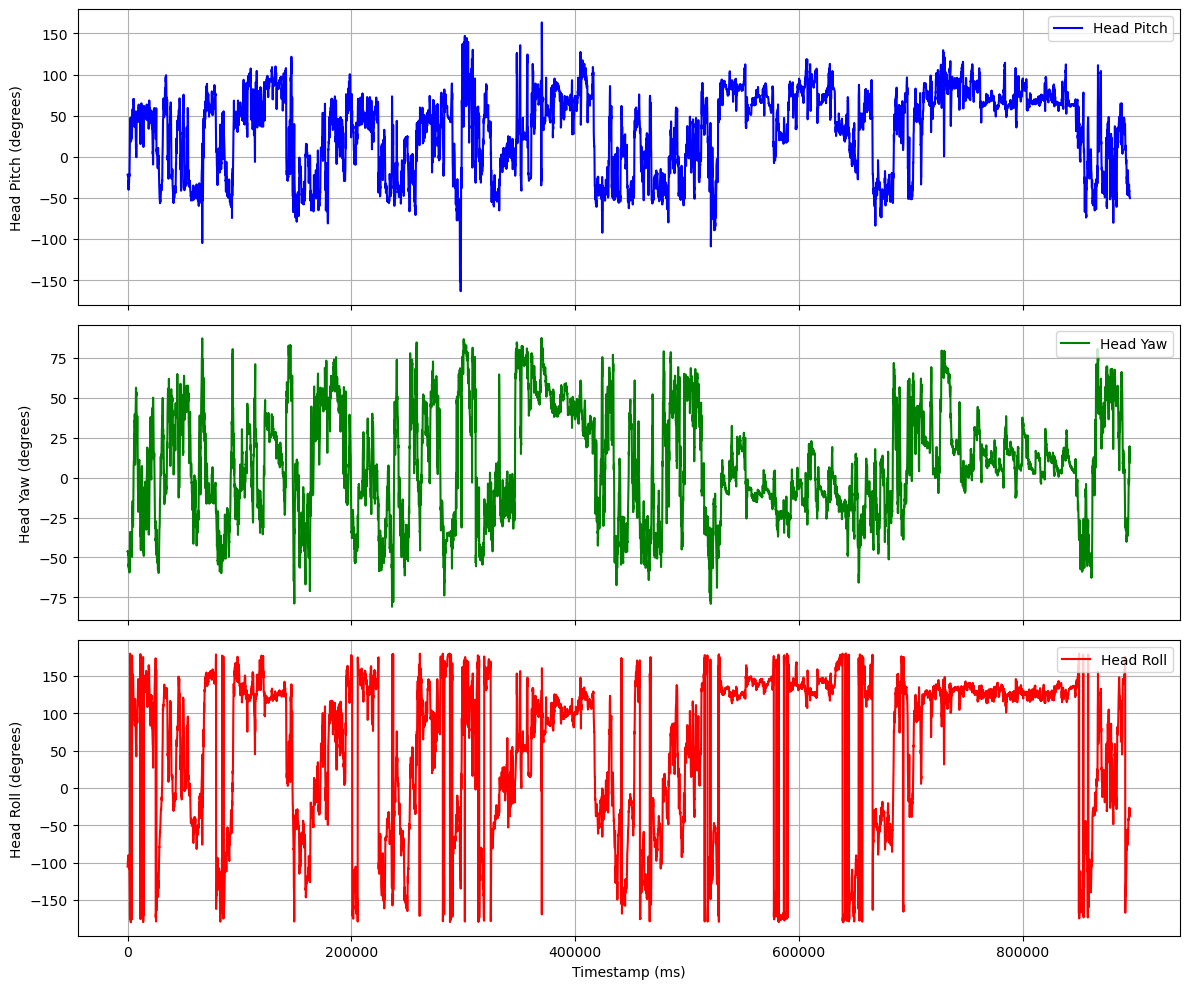

In [4]:
import matplotlib.pyplot as plt
# df_merged_with_dF_F
# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot head_pitch
ax[0].plot(df_merged_with_dF_F.index, df_merged_with_dF_F['head_pitch'], label='Head Pitch', color='blue')
ax[0].set_ylabel('Head Pitch (degrees)')
ax[0].legend(loc='upper right')
ax[0].grid(True)

# Plot head_yaw
ax[1].plot(df_merged_with_dF_F.index, df_merged_with_dF_F['head_yaw'], label='Head Yaw', color='green')
ax[1].set_ylabel('Head Yaw (degrees)')
ax[1].legend(loc='upper right')
ax[1].grid(True)

# Plot head_roll
ax[2].plot(df_merged_with_dF_F.index, df_merged_with_dF_F['head_roll'], label='Head Roll', color='red')
ax[2].set_xlabel('Timestamp (ms)')
ax[2].set_ylabel('Head Roll (degrees)')
ax[2].legend(loc='upper right')
ax[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
